# Import Library yang dibutuhkan

In [ ]:
import pandas as pd

# Pengenalan Dataset

In [ ]:
path = r"/content/NationalTotalAndSubcategory (1).csv"
df = pd.read_csv(path)
print(df.head())


         Date   Category                             Subcategory Variable  \
0  2019-10-06    Alcohol                                   Other  Dollars   
1  2019-10-06  All foods                               All foods  Dollars   
2  2019-10-06  Beverages                Carbonated non-alcoholic  Dollars   
3  2019-10-06  Beverages  Fruit drinks and non-carbonated sugary  Dollars   
4  2019-10-06  Beverages                                   Other  Dollars   

          Value  
0  1.150829e+09  
1  1.304327e+10  
2  7.350713e+08  
3  7.290711e+08  
4  2.271993e+08  


In [ ]:
print(df.isnull().sum())
print(f"Jumlah baris: {df.shape[0]}, Jumlah kolom: {df.shape[1]}")


Date               0
Category           0
Subcategory        0
Variable           0
Value          33696
dtype: int64
Jumlah baris: 152280, Jumlah kolom: 5


In [ ]:
print(df.duplicated().sum())
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")

0
Jumlah baris duplikat: 0


# Preprocessing

a) Mengecilkan Data agar tidak mengganggu kinerja algoritma

In [ ]:
data_trimmed = df.iloc[:30001]
print(df)
print(df.info())

              Date    Category                             Subcategory  \
0       2019-10-06     Alcohol                                   Other   
1       2019-10-06   All foods                               All foods   
2       2019-10-06   Beverages                Carbonated non-alcoholic   
3       2019-10-06   Beverages  Fruit drinks and non-carbonated sugary   
4       2019-10-06   Beverages                                   Other   
...            ...         ...                                     ...   
152275  2023-05-07  Vegetables         Other-mostly water fresh/frozen   
152276  2023-05-07  Vegetables             Other-nutrient-dense canned   
152277  2023-05-07  Vegetables       Other-nutrient-dense fresh/frozen   
152278  2023-05-07  Vegetables                          Starchy canned   
152279  2023-05-07  Vegetables                    Starchy fresh/frozen   

                            Variable         Value  
0                            Dollars  1.150829e+09  
1    

In [ ]:
df_cleaned = df.drop(range(30001, 152280))

df_cleaned.shape
df_cleaned

,Date,Category,Subcategory,Variable,Value
0,2019-10-06,Alcohol,Other,Dollars,1.150829e+09
1,2019-10-06,All foods,All foods,Dollars,1.304327e+10
2,2019-10-06,Beverages,Carbonated non-alcoholic,Dollars,7.350713e+08
3,2019-10-06,Beverages,Fruit drinks and non-carbonated sugary,Dollars,7.290711e+08
4,2019-10-06,Beverages,Other,Dollars,2.271993e+08
...,...,...,...,...,...
29996,2023-03-12,Grains,Frozen/ready to cook,Dollars 3 years ago,4.358148e+07
29997,2023-03-12,Grains,Not sweet packaged/Meals and sides,Dollars 3 years ago,1.180766e+08
29998,2023-03-12,Grains,Other,Dollars 3 years ago,1.708381e+08
29999,2023-03-12,Grains,"Packaged (bread, rolls, pita, tortilla, rice, ...",Dollars 3 years ago,6.796725e+08


b) Menghapus Kolom Variabel dan Value

In [ ]:
df_cleaned = df.drop(columns=['Variable', 'Value'])
df_cleaned.head(), df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152280 entries, 0 to 152279
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         152280 non-null  object
 1   Category     152280 non-null  object
 2   Subcategory  152280 non-null  object
dtypes: object(3)
memory usage: 3.5+ MB


(         Date   Category                             Subcategory
 0  2019-10-06    Alcohol                                   Other
 1  2019-10-06  All foods                               All foods
 2  2019-10-06  Beverages                Carbonated non-alcoholic
 3  2019-10-06  Beverages  Fruit drinks and non-carbonated sugary
 4  2019-10-06  Beverages                                   Other,
 None)

c)  Pengubahan Kolom "Date" ke Format Tanggal yang Sesuai

In [ ]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')
df_cleaned['Date'].dtype, df_cleaned.head()


(dtype('<M8[ns]'),
         Date   Category                             Subcategory
 0 2019-10-06    Alcohol                                   Other
 1 2019-10-06  All foods                               All foods
 2 2019-10-06  Beverages                Carbonated non-alcoholic
 3 2019-10-06  Beverages  Fruit drinks and non-carbonated sugary
 4 2019-10-06  Beverages                                   Other)

e) Pembersihan Kolom Kategori dan Subkategori

In [ ]:
category_counts = df_cleaned['Category'].value_counts()
subcategory_counts = df_cleaned['Subcategory'].value_counts()

category_counts[category_counts < 1000], subcategory_counts[subcategory_counts < 1000]


(Series([], Name: count, dtype: int64), Series([], Name: count, dtype: int64))

f) Menghapus data kategori 'Other' pada kolom Category dan Subcategory

In [ ]:
df_cleaned = df_cleaned[(df_cleaned['Category'] != 'Other') & (df_cleaned['Subcategory'] != 'Other')]


g)  Membuat representasi transaksi berdasarkan 'Date', 'Category', dan 'Subcategory'

In [ ]:
df_transactions = df_cleaned.groupby(['Date', 'Category', 'Subcategory']).size().unstack(fill_value=0)

df_transactions


Subcategory                             All foods  Carbonated non-alcoholic  \
Date       Category                                                           
2019-10-06 All foods                           15                         0   
           Beverages                            0                        15   
           Commercially prepared items          0                         0   
           Dairy                                0                         0   
           Fats and oils                        0                         0   
...                                           ...                       ...   
2023-05-07 Fruits                               0                         0   
           Grains                               0                         0   
           Meats, eggs, and nuts                0                         0   
           Sugar and sweeteners                 0                         0   
           Vegetables                           0                         0   

Subcategory                             Cheese  Dark green canned  \
Date       Category                                                 
2019-10-06 All foods                         0                  0   
           Beverages                         0                  0   
           Commercially prepared items       0                  0   
           Dairy                            15                  0   
           Fats and oils                     0                  0   
...                                        ...                ...   
2023-05-07 Fruits                            0                  0   
           Grains                            0                  0   
           Meats, eggs, and nuts             0                  0   
           Sugar and sweeteners              0                  0   
           Vegetables                        0                 15   

Subcategory                             Dark green fresh/frozen  Eggs  \
Date       Category                                                     
2019-10-06 All foods                                          0     0   
           Beverages                                          0     0   
           Commercially prepared items                        0     0   
           Dairy                                              0     0   
           Fats and oils                                      0     0   
...                                                         ...   ...   
2023-05-07 Fruits                                             0     0   
           Grains                                             0     0   
           Meats, eggs, and nuts                              0    15   
           Sugar and sweeteners                               0     0   
           Vegetables                                        15     0   

Subcategory                             Fish fresh/frozen  Flour and mixes  \
Date       Category                                                          
2019-10-06 All foods                                    0                0   
           Beverages                                    0                0   
           Commercially prepared items                  0                0   
           Dairy                                        0                0   
           Fats and oils                                0                0   
...                                                   ...              ...   
2023-05-07 Fruits                                       0                0   
           Grains                                       0               15   
           Meats, eggs, and nuts                       15                0   
           Sugar and sweeteners                         0                0   
           Vegetables                                   0                0   

Subcategory                             Frozen/ready to cook  \
Date       Category                          

h) Menggunakan One-Hot Encoding untuk mengonversi kategori/subkategori menjadi format binary matrix

In [ ]:
df_encoded = df_transactions.applymap(lambda x: 1 if x > 0 else 0)

df_encoded


<ipython-input-56-509225616>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_encoded = df_transactions.applymap(lambda x: 1 if x > 0 else 0)


Subcategory                             All foods  Carbonated non-alcoholic  \
Date       Category                                                           
2019-10-06 All foods                            1                         0   
           Beverages                            0                         1   
           Commercially prepared items          0                         0   
           Dairy                                0                         0   
           Fats and oils                        0                         0   
...                                           ...                       ...   
2023-05-07 Fruits                               0                         0   
           Grains                               0                         0   
           Meats, eggs, and nuts                0                         0   
           Sugar and sweeteners                 0                         0   
           Vegetables                           0                         0   

Subcategory                             Cheese  Dark green canned  \
Date       Category                                                 
2019-10-06 All foods                         0                  0   
           Beverages                         0                  0   
           Commercially prepared items       0                  0   
           Dairy                             1                  0   
           Fats and oils                     0                  0   
...                                        ...                ...   
2023-05-07 Fruits                            0                  0   
           Grains                            0                  0   
           Meats, eggs, and nuts             0                  0   
           Sugar and sweeteners              0                  0   
           Vegetables                        0                  1   

Subcategory                             Dark green fresh/frozen  Eggs  \
Date       Category                                                     
2019-10-06 All foods                                          0     0   
           Beverages                                          0     0   
           Commercially prepared items                        0     0   
           Dairy                                              0     0   
           Fats and oils                                      0     0   
...                                                         ...   ...   
2023-05-07 Fruits                                             0     0   
           Grains                                             0     0   
           Meats, eggs, and nuts                              0     1   
           Sugar and sweeteners                               0     0   
           Vegetables                                         1     0   

Subcategory                             Fish fresh/frozen  Flour and mixes  \
Date       Category                                                          
2019-10-06 All foods                                    0                0   
           Beverages                                    0                0   
           Commercially prepared items                  0                0   
           Dairy                                        0                0   
           Fats and oils                                0                0   
...                                                   ...              ...   
2023-05-07 Fruits                                       0                0   
           Grains                                       0                1   
           Meats, eggs, and nuts                        1                0   
           Sugar and sweeteners                         0                0   
           Vegetables                                   0                0   

Subcategory                             Frozen/ready to cook  \
Date       Category                          

i) Pengecekan duplikat ulang

In [ ]:
duplicates = df_encoded[df_encoded.duplicated()]
duplicates_count = duplicates.shape[0]
duplicates.shape[0]

1870

In [ ]:
df_cleaned.to_csv('df_cleaned.csv', index=False)

df_encoded.to_csv('df_encoded.csv', index=True)


# EDA

a) Visualisasi Distribusi Kategori (Category)

<ipython-input-59-2283417933>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


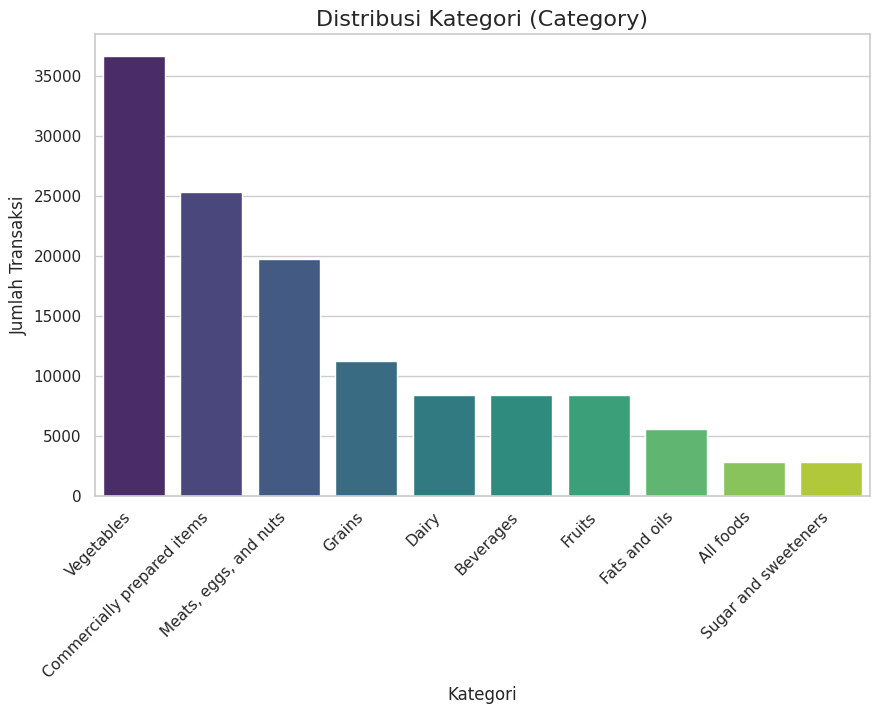

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
category_counts = df_cleaned['Category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribusi Kategori (Category)', fontsize=16)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

b) Visualisasi Distribusi Subkategori (SubCategory)

<ipython-input-60-129003900>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subcategory_counts.index, y=subcategory_counts.values, palette='viridis')


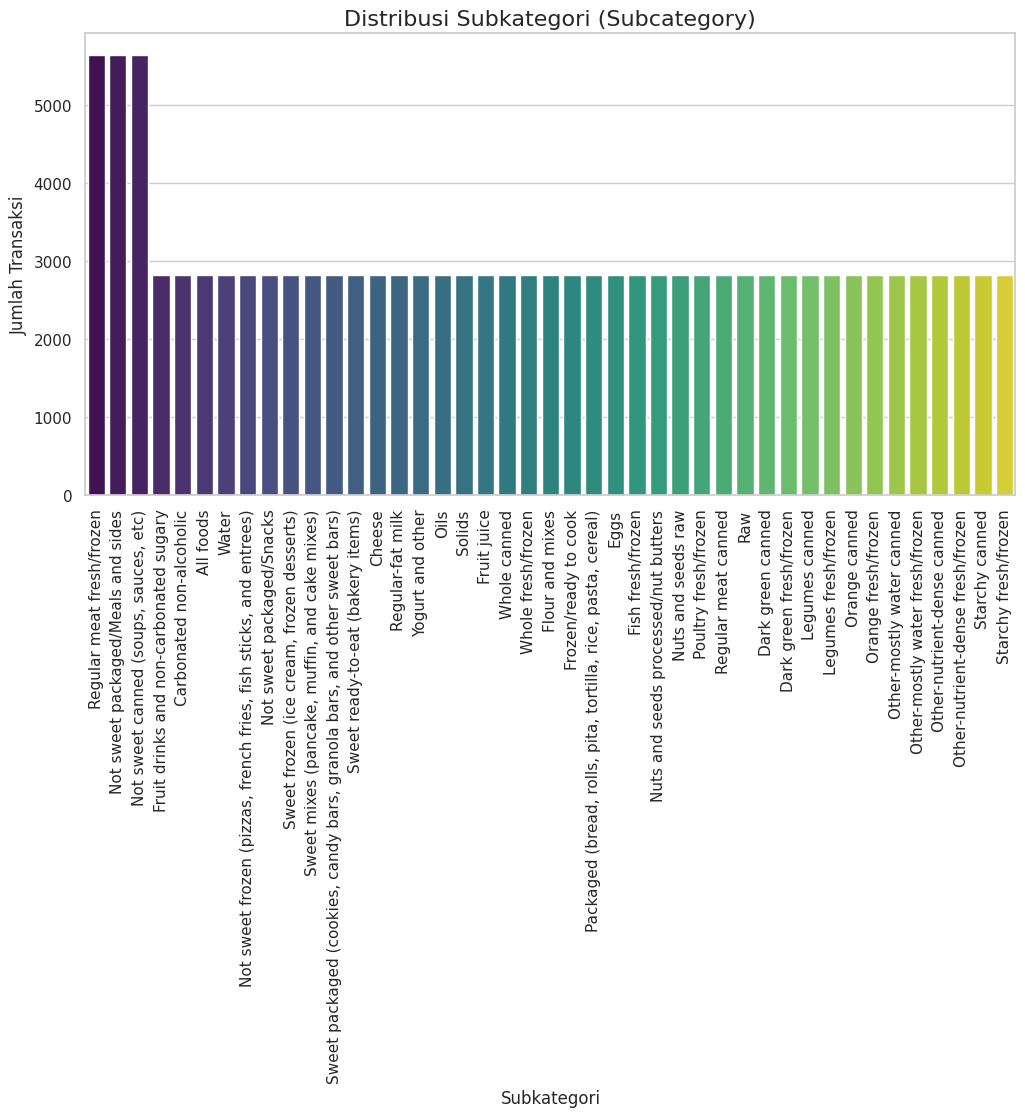

In [ ]:
plt.figure(figsize=(12,6))
subcategory_counts = df_cleaned['Subcategory'].value_counts()
sns.barplot(x=subcategory_counts.index, y=subcategory_counts.values, palette='viridis')
plt.title('Distribusi Subkategori (Subcategory)', fontsize=16)
plt.xlabel('Subkategori', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(rotation=90)
plt.show()

Apriori

Model

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(df_encoded, min_support=0.02, use_colnames=True)

print("Frequent Itemsets:")
print(frequent_itemsets.sort_values(by='support', ascending=False))

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets:
      support                                           itemsets
13        0.2            (Not sweet canned (soups, sauces, etc))
30        0.2                        (Regular meat fresh/frozen)
15        0.2               (Not sweet packaged/Meals and sides)
5906      0.1  (Orange fresh/frozen, Legumes fresh/frozen, Da...
5907      0.1  (Starchy canned, Orange fresh/frozen, Legumes ...
...       ...                                                ...
2958      0.1  (Starchy canned, Legumes canned, Dark green fr...
2959      0.1  (Legumes canned, Dark green fresh/frozen, Star...
2960      0.1  (Orange fresh/frozen, Other-mostly water canne...
2961      0.1  (Orange fresh/frozen, Legumes canned, Dark gre...
2953      0.1  (Orange fresh/frozen, Legumes canned, Dark gre...

[8867 rows x 2 columns]


In [ ]:
print(frequent_itemsets.sort_values(by='support', ascending=False).head(10))

      support                                           itemsets
13        0.2            (Not sweet canned (soups, sauces, etc))
30        0.2                        (Regular meat fresh/frozen)
15        0.2               (Not sweet packaged/Meals and sides)
5906      0.1  (Orange fresh/frozen, Legumes fresh/frozen, Da...
5907      0.1  (Starchy canned, Orange fresh/frozen, Legumes ...
5908      0.1  (Orange fresh/frozen, Legumes fresh/frozen, Da...
5909      0.1  (Orange fresh/frozen, Legumes fresh/frozen, Da...
5910      0.1  (Starchy canned, Orange fresh/frozen, Legumes ...
5911      0.1  (Orange fresh/frozen, Legumes fresh/frozen, Da...
5912      0.1  (Starchy canned, Orange fresh/frozen, Legumes ...


Aturan Asosiasi

In [ ]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
print(rules)

                                      antecedents  \
0        (Fruit drinks and non-carbonated sugary)   
1                      (Carbonated non-alcoholic)   
2                      (Carbonated non-alcoholic)   
3                                         (Water)   
4                                        (Cheese)   
...                                           ...   
1598615         (Other-mostly water fresh/frozen)   
1598616       (Other-nutrient-dense fresh/frozen)   
1598617   (Not sweet canned (soups, sauces, etc))   
1598618                           (Orange canned)   
1598619                       (Dark green canned)   

                                               consequents  \
0                               (Carbonated non-alcoholic)   
1                 (Fruit drinks and non-carbonated sugary)   
2                                                  (Water)   
3                               (Carbonated non-alcoholic)   
4                                       (Regular-fat 

In [ ]:
rules_sorted = rules.sort_values(by='confidence', ascending=False)
rules_sorted = rules_sorted.reset_index(drop=True)
rules_sorted = rules.sort_values(by='confidence', ascending=False).reset_index(drop=True)
top_10_rules = rules_sorted.head(10)
print(top_10_rules)




                                antecedents  \
0                       (Dark green canned)   
1  (Fruit drinks and non-carbonated sugary)   
2                (Carbonated non-alcoholic)   
3                (Carbonated non-alcoholic)   
4                                   (Water)   
5                                  (Cheese)   
6                        (Regular-fat milk)   
7                                  (Cheese)   
8                        (Yogurt and other)   
9                       (Dark green canned)   

                                         consequents  antecedent support  \
0  (Starchy canned, Orange fresh/frozen, Other-mo...                 0.1   
1                         (Carbonated non-alcoholic)                 0.1   
2           (Fruit drinks and non-carbonated sugary)                 0.1   
3                                            (Water)                 0.1   
4                         (Carbonated non-alcoholic)                 0.1   
5                         

In [ ]:
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

                                      antecedents  \
0                             (Dark green canned)   
1        (Fruit drinks and non-carbonated sugary)   
2                      (Carbonated non-alcoholic)   
3                      (Carbonated non-alcoholic)   
4                                         (Water)   
...                                           ...   
1598615   (Not sweet canned (soups, sauces, etc))   
1598616   (Not sweet canned (soups, sauces, etc))   
1598617   (Not sweet canned (soups, sauces, etc))   
1598618   (Not sweet canned (soups, sauces, etc))   
1598619   (Not sweet canned (soups, sauces, etc))   

                                               consequents  support  \
0        (Starchy canned, Orange fresh/frozen, Other-mo...      0.1   
1                               (Carbonated non-alcoholic)      0.1   
2                 (Fruit drinks and non-carbonated sugary)      0.1   
3                                                  (Water)      0.1   
4       

In [ ]:
print("\nTop 10 Association Rules berdasarkan Support, Confidence, Lift:")
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


Top 10 Association Rules berdasarkan Support, Confidence, Lift:
                                antecedents  \
0                       (Dark green canned)   
1  (Fruit drinks and non-carbonated sugary)   
2                (Carbonated non-alcoholic)   
3                (Carbonated non-alcoholic)   
4                                   (Water)   
5                                  (Cheese)   
6                        (Regular-fat milk)   
7                                  (Cheese)   
8                        (Yogurt and other)   
9                       (Dark green canned)   

                                         consequents  support  confidence  \
0  (Starchy canned, Orange fresh/frozen, Other-mo...      0.1         1.0   
1                         (Carbonated non-alcoholic)      0.1         1.0   
2           (Fruit drinks and non-carbonated sugary)      0.1         1.0   
3                                            (Water)      0.1         1.0   
4                         (Carbo

In [ ]:
def frozenset_to_str(fset):
    return ', '.join(list(fset))

print("Hasil Aturan Asosiasi:\n")
for i, row in rules_sorted.head(10).iterrows():
    antecedents = frozenset_to_str(row['antecedents'])
    consequents = frozenset_to_str(row['consequents'])
    confidence = row['confidence']
    support = row['support']
    lift = row['lift']

    print(f"Aturan {i+1}: Jika membeli [{antecedents}], maka kemungkinan membeli [{consequents}]")
    print(f"   - Support: {support:.2f}")
    print(f"   - Confidence: {confidence:.2f}")
    print(f"   - Lift: {lift:.2f}")
    print()

Hasil Aturan Asosiasi:

Aturan 1: Jika membeli [Dark green canned], maka kemungkinan membeli [Starchy canned, Orange fresh/frozen, Other-mostly water canned, Legumes fresh/frozen, Legumes canned, Dark green fresh/frozen, Starchy fresh/frozen, Other-nutrient-dense canned, Other-mostly water fresh/frozen, Other-nutrient-dense fresh/frozen, Not sweet canned (soups, sauces, etc), Orange canned]
   - Support: 0.10
   - Confidence: 1.00
   - Lift: 10.00

Aturan 2: Jika membeli [Fruit drinks and non-carbonated sugary], maka kemungkinan membeli [Carbonated non-alcoholic]
   - Support: 0.10
   - Confidence: 1.00
   - Lift: 10.00

Aturan 3: Jika membeli [Carbonated non-alcoholic], maka kemungkinan membeli [Fruit drinks and non-carbonated sugary]
   - Support: 0.10
   - Confidence: 1.00
   - Lift: 10.00

Aturan 4: Jika membeli [Carbonated non-alcoholic], maka kemungkinan membeli [Water]
   - Support: 0.10
   - Confidence: 1.00
   - Lift: 10.00

Aturan 5: Jika membeli [Water], maka kemungkinan mem

<ipython-input-68-4175831541>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets_str', data=top_items_apriori, palette='viridis')
<ipython-input-68-4175831541>:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


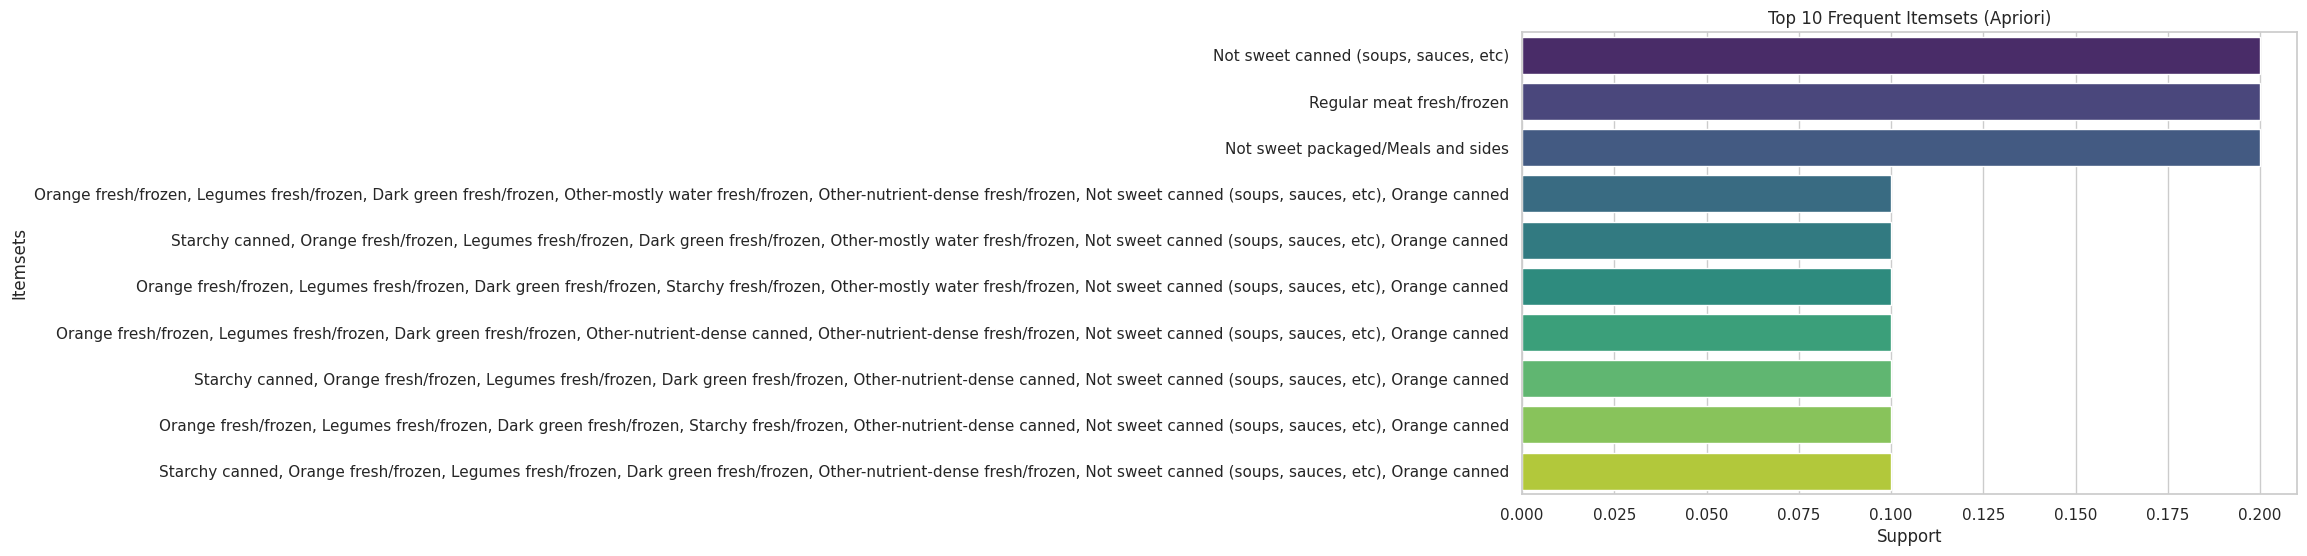

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
top_items_apriori = frequent_itemsets.sort_values(by='support', ascending=False).head(10)
top_items_apriori['itemsets_str'] = top_items_apriori['itemsets'].apply(lambda x: ', '.join(list(x)))
sns.barplot(x='support', y='itemsets_str', data=top_items_apriori, palette='viridis')
plt.title('Top 10 Frequent Itemsets (Apriori)')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.tight_layout()
plt.show()


FP-Growth

Model

In [ ]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.02, use_colnames=True)

print("Frequent Itemsets (FP-Growth):")
print(frequent_itemsets_fp.sort_values(by='support', ascending=False))

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Frequent Itemsets (FP-Growth):
      support                                           itemsets
4         0.2            (Not sweet canned (soups, sauces, etc))
5         0.2               (Not sweet packaged/Meals and sides)
6         0.2                        (Regular meat fresh/frozen)
5921      0.1  (Legumes fresh/frozen, Legumes canned, Starchy...
5908      0.1  (Orange fresh/frozen, Other-mostly water canne...
...       ...                                                ...
2958      0.1  (Orange fresh/frozen, Legumes fresh/frozen, Le...
2959      0.1  (Other-mostly water canned, Legumes fresh/froz...
2960      0.1  (Legumes fresh/frozen, Legumes canned, Dark gr...
2961      0.1  (Legumes fresh/frozen, Legumes canned, Dark gr...
2953      0.1  (Not sweet canned (soups, sauces, etc), Starch...

[8867 rows x 2 columns]


In [ ]:
print(frequent_itemsets_fp.sort_values(by='support', ascending=False).head(10))

      support                                           itemsets
4         0.2            (Not sweet canned (soups, sauces, etc))
5         0.2               (Not sweet packaged/Meals and sides)
6         0.2                        (Regular meat fresh/frozen)
5921      0.1  (Legumes fresh/frozen, Legumes canned, Starchy...
5908      0.1  (Orange fresh/frozen, Other-mostly water canne...
5909      0.1  (Orange fresh/frozen, Legumes fresh/frozen, Le...
5910      0.1  (Orange fresh/frozen, Legumes fresh/frozen, Le...
5911      0.1  (Starchy canned, Orange fresh/frozen, Legumes ...
5912      0.1  (Orange fresh/frozen, Legumes fresh/frozen, Le...
5913      0.1  (Other-mostly water canned, Legumes fresh/froz...


Aturan Asosiasi

In [ ]:
rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.5)
print("Aturan Asosiasi (FP-Growth):")
print(rules_fp)


Aturan Asosiasi (FP-Growth):
                                      antecedents  \
0        (Fruit drinks and non-carbonated sugary)   
1                                         (Water)   
2        (Fruit drinks and non-carbonated sugary)   
3                      (Carbonated non-alcoholic)   
4                      (Carbonated non-alcoholic)   
...                                           ...   
1598615         (Other-mostly water fresh/frozen)   
1598616       (Other-nutrient-dense fresh/frozen)   
1598617   (Not sweet canned (soups, sauces, etc))   
1598618                           (Orange canned)   
1598619                       (Dark green canned)   

                                               consequents  \
0                                                  (Water)   
1                 (Fruit drinks and non-carbonated sugary)   
2                               (Carbonated non-alcoholic)   
3                 (Fruit drinks and non-carbonated sugary)   
4                       

In [ ]:
rules_sorted_fp = rules_fp.sort_values(by='confidence', ascending=False).reset_index(drop=True)
top_10_rules_fp = rules_sorted_fp.head(10)
print("Top 10 Aturan Asosiasi (FP-Growth) berdasarkan Confidence:")
print(top_10_rules_fp)


Top 10 Aturan Asosiasi (FP-Growth) berdasarkan Confidence:
                                         antecedents  \
0                                (Dark green canned)   
1           (Fruit drinks and non-carbonated sugary)   
2                                            (Water)   
3           (Fruit drinks and non-carbonated sugary)   
4                         (Carbonated non-alcoholic)   
5                         (Carbonated non-alcoholic)   
6                                            (Water)   
7  (Fruit drinks and non-carbonated sugary, Carbo...   
8    (Fruit drinks and non-carbonated sugary, Water)   
9                  (Carbonated non-alcoholic, Water)   

                                         consequents  antecedent support  \
0  (Starchy canned, Orange fresh/frozen, Other-mo...                 0.1   
1                                            (Water)                 0.1   
2           (Fruit drinks and non-carbonated sugary)                 0.1   
3                   

In [ ]:
print("\nDetail Aturan Asosiasi (FP-Growth) (Antecedents, Consequents, Support, Confidence, Lift):")
print(rules_sorted_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Detail Aturan Asosiasi (FP-Growth) (Antecedents, Consequents, Support, Confidence, Lift):
                                      antecedents  \
0                             (Dark green canned)   
1        (Fruit drinks and non-carbonated sugary)   
2                                         (Water)   
3        (Fruit drinks and non-carbonated sugary)   
4                      (Carbonated non-alcoholic)   
...                                           ...   
1598615   (Not sweet canned (soups, sauces, etc))   
1598616               (Regular meat fresh/frozen)   
1598617   (Not sweet canned (soups, sauces, etc))   
1598618               (Regular meat fresh/frozen)   
1598619      (Not sweet packaged/Meals and sides)   

                                               consequents  support  \
0        (Starchy canned, Orange fresh/frozen, Other-mo...      0.1   
1                                                  (Water)      0.1   
2                 (Fruit drinks and non-carbonated sugary) 

In [ ]:
print("\nTop 10 Association Rules (FP-Growth) berdasarkan Support, Confidence, Lift:")
print(rules_sorted_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))



Top 10 Association Rules (FP-Growth) berdasarkan Support, Confidence, Lift:
                                         antecedents  \
0                                (Dark green canned)   
1           (Fruit drinks and non-carbonated sugary)   
2                                            (Water)   
3           (Fruit drinks and non-carbonated sugary)   
4                         (Carbonated non-alcoholic)   
5                         (Carbonated non-alcoholic)   
6                                            (Water)   
7  (Fruit drinks and non-carbonated sugary, Carbo...   
8    (Fruit drinks and non-carbonated sugary, Water)   
9                  (Carbonated non-alcoholic, Water)   

                                         consequents  support  confidence  \
0  (Starchy canned, Orange fresh/frozen, Other-mo...      0.1         1.0   
1                                            (Water)      0.1         1.0   
2           (Fruit drinks and non-carbonated sugary)      0.1         1.0  

In [ ]:
def frozenset_to_str(fset):
    return ', '.join(list(fset))

print("\nHasil Aturan Asosiasi FP-Growth dalam Bahasa Natural:\n")
for i, row in rules_sorted_fp.head(10).iterrows():
    antecedents = frozenset_to_str(row['antecedents'])
    consequents = frozenset_to_str(row['consequents'])
    confidence = row['confidence']
    support = row['support']
    lift = row['lift']

    print(f"Aturan {i+1}: Jika membeli [{antecedents}], maka kemungkinan membeli [{consequents}]")
    print(f"   - Support: {support:.2f}")
    print(f"   - Confidence: {confidence:.2f}")
    print(f"   - Lift: {lift:.2f}")
    print()


Hasil Aturan Asosiasi FP-Growth dalam Bahasa Natural:

Aturan 1: Jika membeli [Dark green canned], maka kemungkinan membeli [Starchy canned, Orange fresh/frozen, Other-mostly water canned, Legumes fresh/frozen, Legumes canned, Dark green fresh/frozen, Starchy fresh/frozen, Other-nutrient-dense canned, Other-mostly water fresh/frozen, Other-nutrient-dense fresh/frozen, Not sweet canned (soups, sauces, etc), Orange canned]
   - Support: 0.10
   - Confidence: 1.00
   - Lift: 10.00

Aturan 2: Jika membeli [Fruit drinks and non-carbonated sugary], maka kemungkinan membeli [Water]
   - Support: 0.10
   - Confidence: 1.00
   - Lift: 10.00

Aturan 3: Jika membeli [Water], maka kemungkinan membeli [Fruit drinks and non-carbonated sugary]
   - Support: 0.10
   - Confidence: 1.00
   - Lift: 10.00

Aturan 4: Jika membeli [Fruit drinks and non-carbonated sugary], maka kemungkinan membeli [Carbonated non-alcoholic]
   - Support: 0.10
   - Confidence: 1.00
   - Lift: 10.00

Aturan 5: Jika membeli [C

<ipython-input-39-2225471475>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y='itemsets_str', data=top_items_fp, palette='plasma')
<ipython-input-39-2225471475>:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


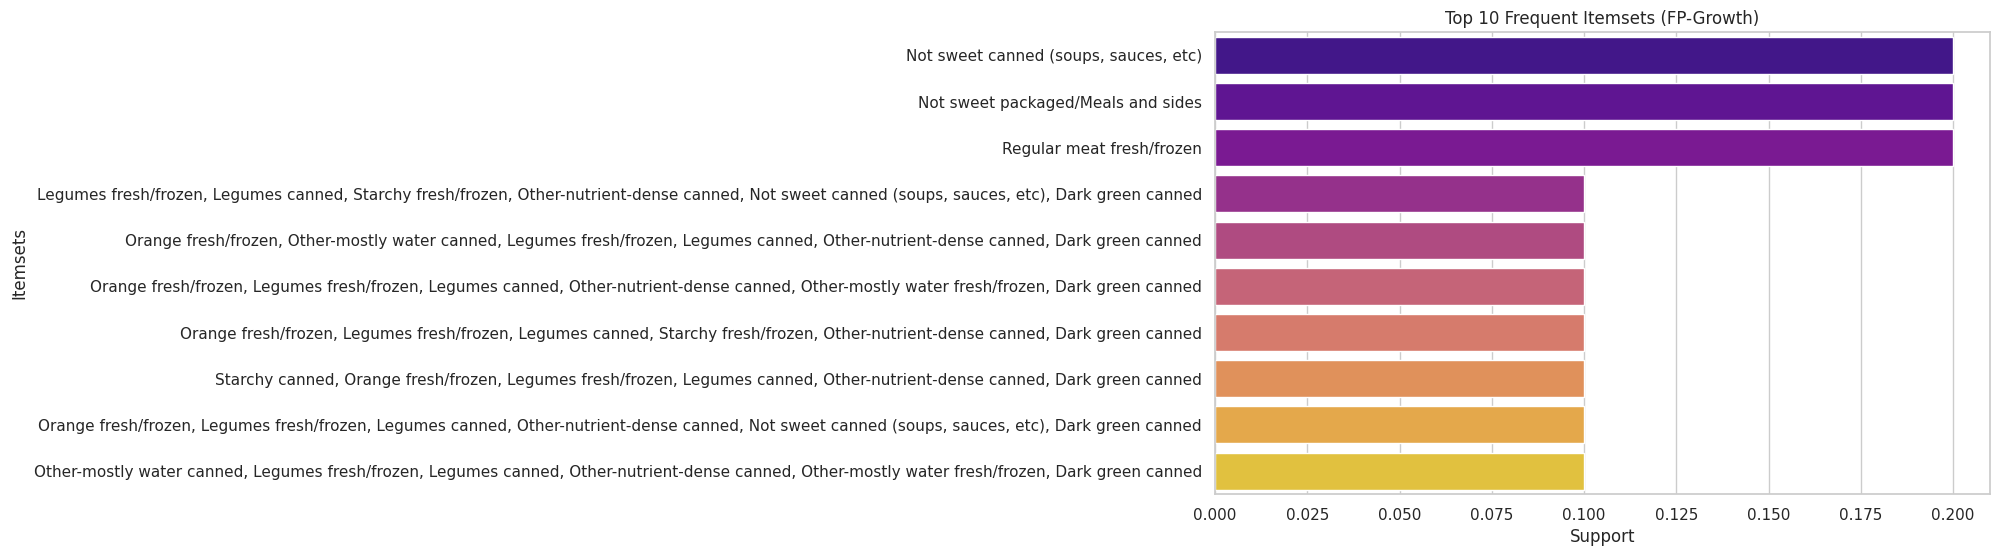

In [ ]:
plt.figure(figsize=(10,6))
top_items_fp = frequent_itemsets_fp.sort_values(by='support', ascending=False).head(10)
top_items_fp['itemsets_str'] = top_items_fp['itemsets'].apply(lambda x: ', '.join(list(x)))
sns.barplot(x='support', y='itemsets_str', data=top_items_fp, palette='plasma')
plt.title('Top 10 Frequent Itemsets (FP-Growth)')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.tight_layout()
plt.show()


# K-Means (Clustering)

In [ ]:
path = r"/content/NationalTotalAndSubcategory (1).csv"
df = pd.read_csv(path)
print(df.head())
print(df.info())

         Date   Category                             Subcategory Variable  \
0  2019-10-06    Alcohol                                   Other  Dollars   
1  2019-10-06  All foods                               All foods  Dollars   
2  2019-10-06  Beverages                Carbonated non-alcoholic  Dollars   
3  2019-10-06  Beverages  Fruit drinks and non-carbonated sugary  Dollars   
4  2019-10-06  Beverages                                   Other  Dollars   

          Value  
0  1.150829e+09  
1  1.304327e+10  
2  7.350713e+08  
3  7.290711e+08  
4  2.271993e+08  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152280 entries, 0 to 152279
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         152280 non-null  object 
 1   Category     152280 non-null  object 
 2   Subcategory  152280 non-null  object 
 3   Variable     152280 non-null  object 
 4   Value        118584 non-null  float64
dtypes: float64(1)

### Pemodelan

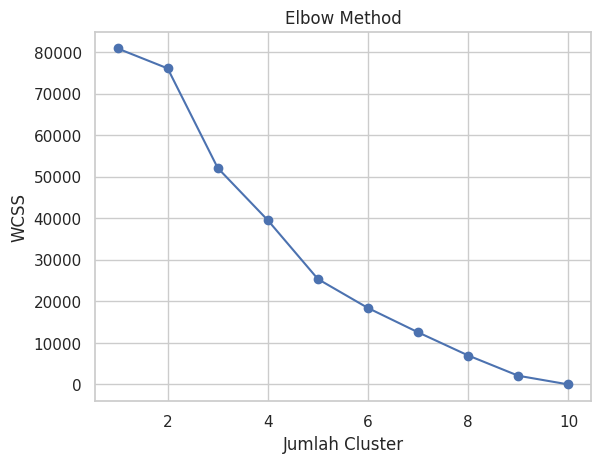

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

path_scaled = r'/content/df_encoded.csv'
df = pd.read_csv(path_scaled)
df_non_numeric = df[['Date', 'Category']]
df_numeric = df.drop(columns=['Date', 'Category'])

scaler = StandardScaler()
scaled = scaler.fit_transform(df_numeric)

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_numeric)
labels = kmeans.labels_

In [ ]:
df['Cluster'] = labels
df_final = pd.concat([df_non_numeric.reset_index(drop=True), df_numeric, df[['Cluster']]], axis=1)
print(df_final.head())
print(df_final['Cluster'].value_counts())

         Date                     Category  All foods  \
0  2019-10-06                    All foods          1   
1  2019-10-06                    Beverages          0   
2  2019-10-06  Commercially prepared items          0   
3  2019-10-06                        Dairy          0   
4  2019-10-06                Fats and oils          0   

   Carbonated non-alcoholic  Cheese  Dark green canned  \
0                         0       0                  0   
1                         1       0                  0   
2                         0       0                  0   
3                         0       1                  0   
4                         0       0                  0   

   Dark green fresh/frozen  Eggs  Fish fresh/frozen  Flour and mixes  ...  \
0                        0     0                  0                0  ...   
1                        0     0                  0                0  ...   
2                        0     0                  0                0  ...   


In [ ]:
cluster_summary = df_final.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary.T)

Cluster                                               0      1    2
All foods                                           0.0  0.125  0.0
Carbonated non-alcoholic                            0.0  0.125  0.0
Cheese                                              0.0  0.125  0.0
Dark green canned                                   0.0  0.000  1.0
Dark green fresh/frozen                             0.0  0.000  1.0
Eggs                                                0.0  0.125  0.0
Fish fresh/frozen                                   0.0  0.125  0.0
Flour and mixes                                     0.0  0.125  0.0
Frozen/ready to cook                                0.0  0.125  0.0
Fruit drinks and non-carbonated sugary              0.0  0.125  0.0
Fruit juice                                         0.0  0.125  0.0
Legumes canned                                      0.0  0.000  1.0
Legumes fresh/frozen                                0.0  0.000  1.0
Not sweet canned (soups, sauces, etc)           

* Intepretasi

Cluster:

0)	Konsumsi sangat minim, hanya bahan dasar (oils)	Hemat & hanya beli yang esensial

1)	Konsumsi ringan di banyak kategori	Konsumen umum, suka yang praktis

2)	Konsumsi tinggi pada sayur & makanan alami	Plant-based, sehat, natural eater

<ipython-input-42-1266700808>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_final, palette='Set2')


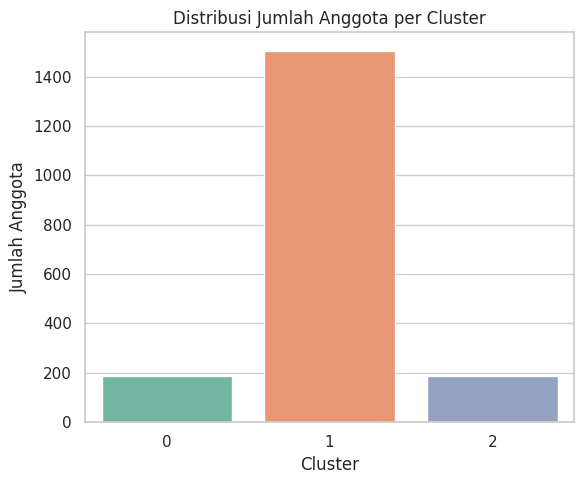

In [ ]:
# Jumlah anggota tiap cluster
plt.figure(figsize=(6,5))
sns.countplot(x='Cluster', data=df_final, palette='Set2')
plt.title('Distribusi Jumlah Anggota per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Anggota')
plt.tight_layout()
plt.show()